## Digital Image Processing Lab 08
##### M. Shaheer Ijaz
##### 01-134212-127
##### BS ( CS ) 7-B

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

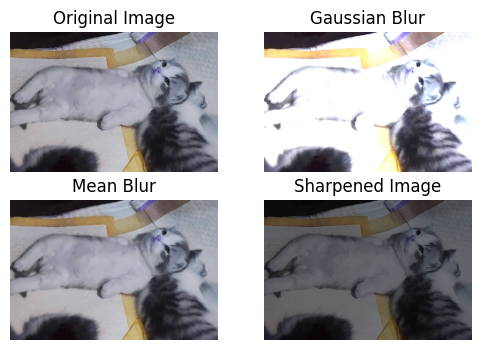

In [ ]:
img = cv2.imread("img.jpg")

gaussianBlurKernel = np.array(([[1, 2, 1], [2, 4, 2], [1, 2, 1]]), np.float32)/9
sharpenKernel = np.array(([[0, -1, 0], [-1, 9, -1], [0, -1, 0]]), np.float32)/9
meanBlurKernel = np.ones((3, 3), np.float32)/9

gaussianBlur = cv2.filter2D(src=img, kernel=gaussianBlurKernel, ddepth=-1)
meanBlur = cv2.filter2D(src=img, kernel=meanBlurKernel, ddepth=-1)
sharpen = cv2.filter2D(src=img, kernel=sharpenKernel, ddepth=-1)

plt.figure(figsize=(6, 4))
plt.subplot(2, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(gaussianBlur)
plt.title("Gaussian Blur")
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(meanBlur)
plt.title("Mean Blur")
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(sharpen)
plt.title("Sharpened Image")
plt.axis('off')

plt.show()

---
---


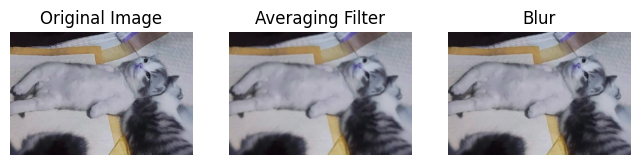

In [9]:
img = cv2.imread("img.jpg")

kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)
blur = cv2.blur(img, (3,3))

plt.figure(figsize=(8,6))
plt.subplot(1,3,1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(dst)
plt.title("Averaging Filter")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(blur)
plt.title("Blur")
plt.axis('off')

plt.show()



---
---

##### Task #1

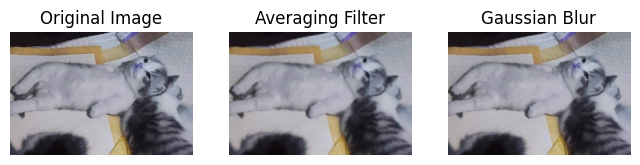

In [10]:
img = cv2.imread("img.jpg")

avg_filter = cv2.blur(img, (5,5))
gaussian_filter = cv2.GaussianBlur(img, (5, 5), 0)

plt.figure(figsize=(8,6))
plt.subplot(1,3,1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(avg_filter)
plt.title("Averaging Filter")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(gaussian_filter)
plt.title("Gaussian Blur")
plt.axis('off')

plt.show()


### Average Filter:
*    Applies a uniform smoothing effect.
*    Each pixel is replaced by the average value of its surrounding 5x5 neighborhood.
*    This often results in a "blocky" or overly smooth appearance, which can reduce fine details.

### Gaussian Filter:
*    Smooths the image with weights distributed according to a Gaussian function.
*    Nearby pixels contribute more to the result than distant ones, creating a more natural blur.
*    This preserves edges better compared to the average filter.

---
---

##### Task #2

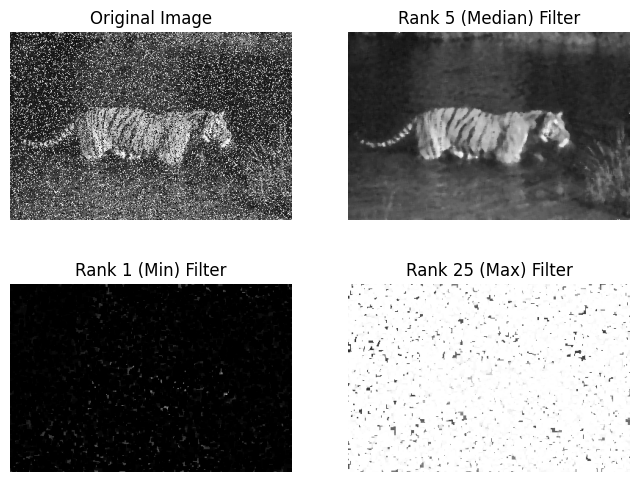

In [12]:
img = cv2.imread("sap.jpg")

r5_filter = cv2.medianBlur(img,5)
r1_filter = cv2.erode(img,np.ones((5,5), np.uint8))
r25_filter = cv2.dilate(img,np.ones((5,5), np.uint8))

plt.figure(figsize=(8,6))
plt.subplot(2,2,1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(r5_filter)
plt.title("Rank 5 (Median) Filter")
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(r1_filter)
plt.title("Rank 1 (Min) Filter")
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(r25_filter)
plt.title("Rank 25 (Max) Filter")
plt.axis('off')

plt.show()


__Rank = 1:__ _This is the minimum filter, replacing each pixel with the minimum value in the 5x5 neighborhood. It can increase the appearance of "pepper" noise (dark spots) while reducing "salt" noise (bright spots)._

__Rank = 25:__ _This is the maximum filter, replacing each pixel with the maximum value in the neighborhood. It can increase "salt" noise while reducing "pepper" noise._

---
---

##### Task #3

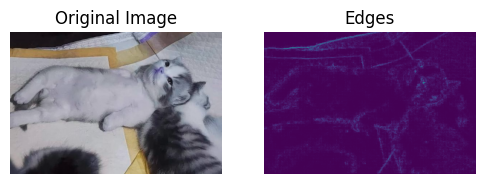

In [17]:
def mylaplacian(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = gray.astype(np.float32) / 255.0
    laplacian_x = np.zeros_like(gray)
    laplacian_y = np.zeros_like(gray)
    for i in range(1, gray.shape[0] - 1):
        for j in range(1, gray.shape[1] - 1):
            laplacian_x[i, j] = gray[i+1, j] + gray[i-1, j] - (2 * gray[i, j])
            laplacian_y[i, j] = gray[i, j+1] + gray[i, j-1] - (2 * gray[i, j])
    laplacian_xy = np.sqrt(laplacian_x**2 + laplacian_y**2)
    return laplacian_xy

img = cv2.imread('img.jpg')
edges = mylaplacian(img)

plt.figure(figsize=(6,4))

plt.subplot(1,2,1)
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(edges)
plt.title("Edges")
plt.axis('off')

plt.show()

##### Comparison:

__Edge Thickness:__ _The Laplacian filter often produces thicker edges compared to the Sobel filter. This can be beneficial in some applications, but it can also make it harder to locate precise edge positions._

__Noise Sensitivity:__ _Both filters are susceptible to noise, but the Laplacian filter can be more sensitive due to its second-order derivative nature._

__Edge Direction:__ _The Sobel filter can provide information about the direction of edges, which can be useful for further processing. The Laplacian filter primarily highlights the presence of edges without providing directional information._